# World Population - Exploratory Data Analysis
## Project 1: Practicing methods Pandas and Nunpy.
###  Exploring "World Population" dataset. Source: https://www.kaggle.com/

### About Dataset

- Rank: Rank by population
- CCA3: 3 digit Country/Territories code
- Country: Name of the Country/Territories
- Capital: Name of the Capital
- Continent: Name of the Continent
- 2022 Population: Population of the Country/Territories in the year 2022
- 2020 Population: Population of the Country/Territories in the year 2020
- 2015 Population: Population of the Country/Territories in the year 2015
- 2010 Population: Population of the Country/Territories in the year 2010
- 2000 Population: Population of the Country/Territories in the year 2000
- 1990 Population: Population of the Country/Territories in the year 1990
- 1980 Population: Population of the Country/Territories in the year 1980
- 1970 Population: Population of the Country/Territories in the year 1970
- Area (km²): Area size of the Country/Territories in square kilometer
- Density (per km²): Population density per square kilometer
- Growth Rate: Population growth rate by Country/Territories
- World Population Percentage: The population percentage by each Country/Territories

### Introduction

The current circumstance made lots of people questioning themselves about population of the planet. Is it decreasing or increasing?

This dataset includes data withing range 1970 - 2022, which gives enought to explore dynamics.

**Questions to be answered:**
- What is the population of Planet?
- Is population of Planet increasing or decreasing?
- Top of most and lest populated countries?
- Top countries with higher growth rate?
- What will be the popilation of planet in 2050?

*China is the most populous country in the world with a population exceeding 1.4 billion. It is one of just two countries with a population of more than 1 billion, with India being the second. As of 2018, India has a population of over 1.355 billion people, and its population growth is expected to continue through at least 2050. By the year 2030, the country of India is expected to become the most populous country in the world. This is because India’s population will grow, while China is projected to see a loss in population.*

*The next 11 countries that are the most populous in the world each have populations exceeding 100 million. These include the United States, Indonesia, Brazil, Pakistan, Nigeria, Bangladesh, Russia, Mexico, Japan, Ethiopia, and the Philippines. Of these nations, all are expected to continue to grow except Russia and Japan, which will see their populations drop by 2030 before falling again significantly by 2050.*

*Many other nations have populations of at least one million, while there are also countries that have just thousands. The smallest population in the world can be found in Vatican City, where only 801 people reside.*

In [1]:
# Import all libraries

!pip install pandas
!pip install matplotlib basemap

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")

### Step 1.

Preliminary overview of the dataset, to see and check structure of data, list of columns, missing data, ets.

In [46]:
# Upload dataset.

url = "https://raw.githubusercontent.com/Koliada-LM-Data/Data-Sets-for-Projects/refs/heads/main/world_population.csv"
req = requests.get(url)
world_df = pd.read_csv(url)

In [47]:
# Preliminary overview of dataset, to see and check structure of data, list of columns, missing data, ets.

# print(world_df)
# world_df.head(5)
# world_df.tail(5)

print('\n First and last 5 rows of data: \n')
display(world_df)


 First and last 5 rows of data: 



,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [49]:
# Quantity of rows and columns in dataset.
# world_df.shape[0] - quantity of raws
# world_df.shape[1] - quantity of columns

print('\n Quantity of rows and columns: \n')
world_df.shape


 Quantity of rows and columns: 



(234, 17)

In [51]:
# Basic information about dataset: number of rows, list of columns, data type per column, quantity of non-null rows, ets.

print('\n Information on dataset: \n')
world_df.info()


 Information on dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country_Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022_Population              234 non-null    int64  
 6   2020_Population              234 non-null    int64  
 7   2015_Population              234 non-null    int64  
 8   2010_Population              234 non-null    int64  
 9   2000_Population              234 non-null    int64  
 10  1990_Population              234 non-null    int64  
 11  1980_Population              234 non-null    int64  
 12  1970_Population              234 non-null    int64

In [52]:
# Check up if null cells are in the dataset.

print('\n Quantity of zero cells per column: \n')
world_df.isnull().sum()


 Quantity of zero cells per column: 



,0
Rank,0
CCA3,0
Country_Territory,0
Capital,0
Continent,0
2022_Population,0
2020_Population,0
2015_Population,0
2010_Population,0
2000_Population,0


In [53]:
# Check up if NA cells are in the dataset.

# world_df.isna().head(5)
print('\n Quantity of NA cells per column: \n')
world_df.isna().sum()


 Quantity of NA cells per column: 



,0
Rank,0
CCA3,0
Country_Territory,0
Capital,0
Continent,0
2022_Population,0
2020_Population,0
2015_Population,0
2010_Population,0
2000_Population,0


In [54]:
# List of columns in dataset.

print('\n List of columns in dataset: \n')
world_df.columns


 List of columns in dataset: 



Index(['Rank', 'CCA3', 'Country_Territory', 'Capital', 'Continent',
       '2022_Population', '2020_Population', '2015_Population',
       '2010_Population', '2000_Population', '1990_Population',
       '1980_Population', '1970_Population', 'Area_(km²)', 'Density_(per_km²)',
       'Growth_Rate', 'World_Population_Percentage'],
      dtype='object')

In [55]:
# Basic statistic on dataset: count(rows), mean, standard deviation, min value, max value, percentiles, ets.

print('\n Statistics on dataset: \n')
world_df.describe()


 Statistics on dataset: 



,Rank,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


## Insights:

- Dataset is small and includes only 234 rows.
- There is no missing values in this dataset.
- There are numeric and categorical cilumns in the Dataset.

### Step 2.

Working with basic methods to extract simple statistical data: Most and least populated countries, ets.

In [56]:
# Sorts dataset by column "2022_Population" in ascending direction and displays 5 upper rows.

world_df.sort_values("2022_Population", ascending=False, ignore_index=True).head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


In [57]:
# Sorts dataset by column "2022_Population" in ascending direction and displays 5 lower rows.

world_df.sort_values("2022_Population", ascending=False, ignore_index=True).tail(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
229,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.0
230,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.0
231,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.0
232,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.0
233,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.0


## Insights:

- China is the most densely populated country with 1.4B people followed by India, United States and others.
- Vatican City is the least populated country with 510 people followed by Tokelau, Niue and others

### Step 3.

Exploring population of countries by continent.

In [67]:
# Calculate quantity of countries per Continent

world_df['Continent'].value_counts()

,count
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


In [68]:
# Calculate the sum of all numeric valuse in the dataset per Continent

continent_df = world_df.groupby(by='Continent').sum(' ')
continent_df

,Rank,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,4336,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55
South America,1366,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48


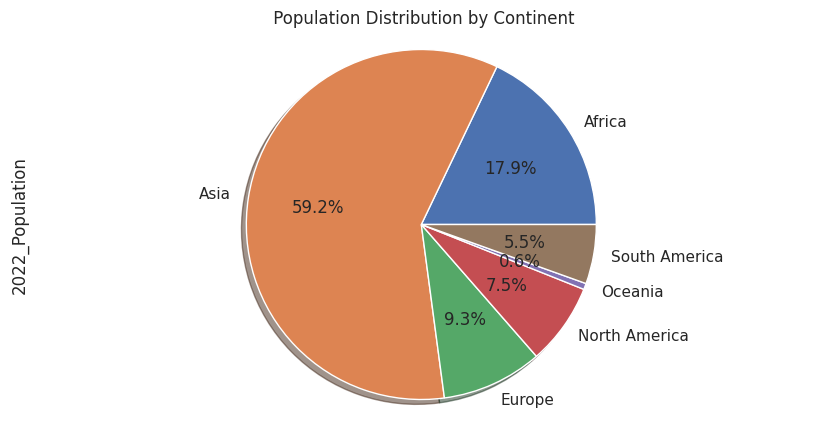

In [72]:
# Pie-chart showing Population Distribution by Continent in percents

continent_df['2022_Population'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%')
plt.title(' Population Distribution by Continent')
plt.axis('equal')
plt.show()

Practice to create subsets of Dataset, use method concat and save subset to csv file.

In [98]:
# Select countries that belong to North America continend and save to separate dataset.

df_North_America = world_df[world_df['Continent'].isin(['North America'])]
df_North_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
10,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00
14,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.4043,1.0051,0.01
17,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00


In [89]:
df_North_America.shape

(40, 18)

In [99]:
# Select countries that belong to South America continend and save to separate dataset.

df_South_America = world_df[world_df['Continent'].isin(['South America'])]
df_South_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
24,80,BOL,Bolivia,Sucre,South America,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,1098581,11.1272,1.0120,0.15
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
40,65,CHL,Chile,Santiago,South America,19603733,19300315,17870124,17004162,15351799,13342868,11469828,9820481,756102,25.9274,1.0057,0.25
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.4339,1.0069,0.65


In [92]:
df_South_America.shape

(14, 18)

In [93]:
# Join to subsets into one with concat method

df_America = pd.concat([df_North_America, df_South_America])
df_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage,Cont_Population
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00,1
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00,1
10,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00,1
14,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.4043,1.0051,0.01,1
17,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00,1


In [94]:
df_America.shape

(54, 18)

In [80]:
# To save selected subset to csv if further distribution is needed.

df_America.to_csv("//content/sample_data/df_America.csv")

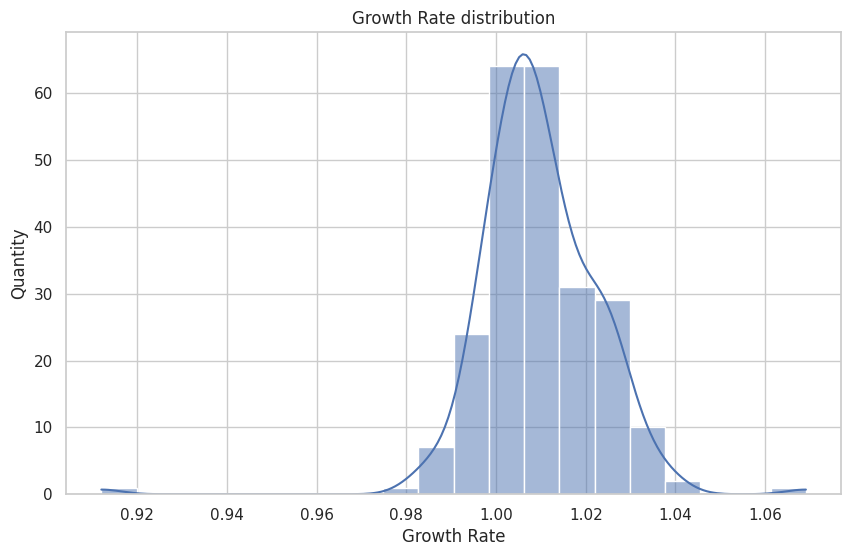


 Growth Rate coefficient demonstrates change in the population of countries.

 Growth Rate = 1 - population reamins the same.

 Growth Rate > 1 - population is increasing.

 Growth Rate < 1 - population is decreasing..

 The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.


In [11]:
# Histogram demonstrating Growth Rate distribution.

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(world_pop['Growth_Rate'], kde=True, bins=20)
plt.title('Growth Rate distribution')
plt.xlabel('Growth Rate')
plt.ylabel('Quantity')
plt.show()

# Growth Rate coefficient demonstrates change in the population of countries.
# Growth Rate = 1 - population reamins the same.
# Growth Rate > 1 - population is increasing.
# Growth Rate < 1 - population is decreasing.
# The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.

print('\n Growth Rate coefficient demonstrates change in the population of countries.')
print('\n Growth Rate = 1 - population reamins the same.')
print('\n Growth Rate > 1 - population is increasing.')
print('\n Growth Rate < 1 - population is decreasing..')
print('\n The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.')


In [13]:
world_pop['1970_Population'].sum()

np.int64(3694136661)

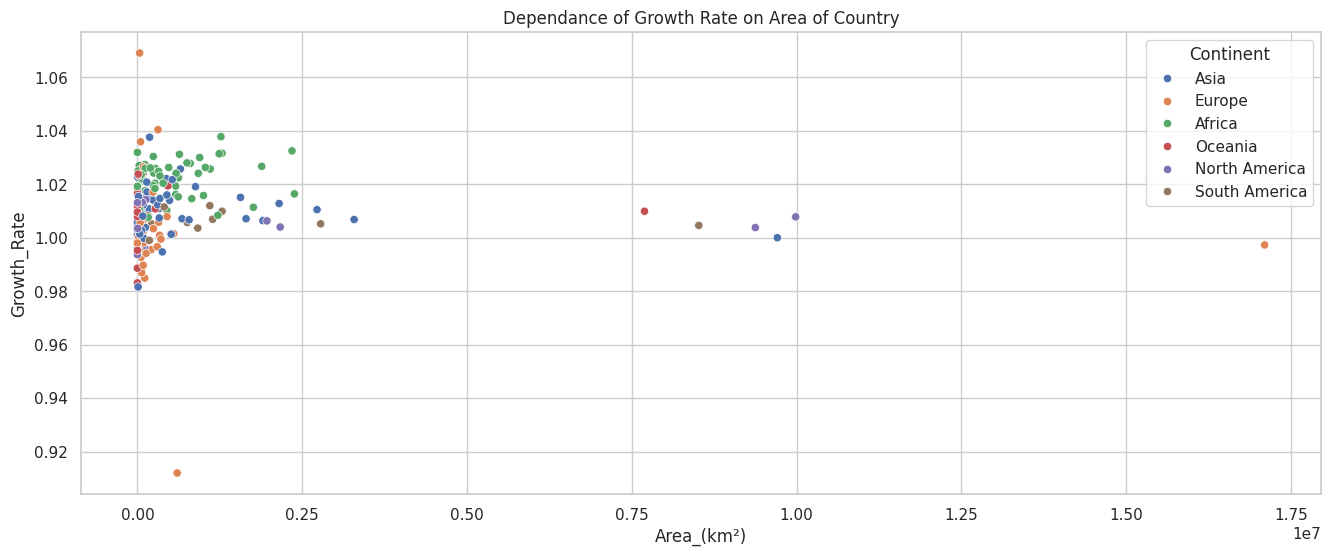

In [14]:
# Scatter plot demonstration connection between growth Rate on Area of Country between continents.

plt.figure(figsize=(16,6))
sns.scatterplot(x='Area_(km²)', y='Growth_Rate', data=world_pop, hue='Continent')
plt.title('Dependance of Growth Rate on Area of Country')
plt.xlabel('Area_(km²)')
plt.ylabel('Growth_Rate')
plt.show()

# The outcome is not very informative. It doest demonstrate strong dependencies of Growth Rate of population on Area of Country.

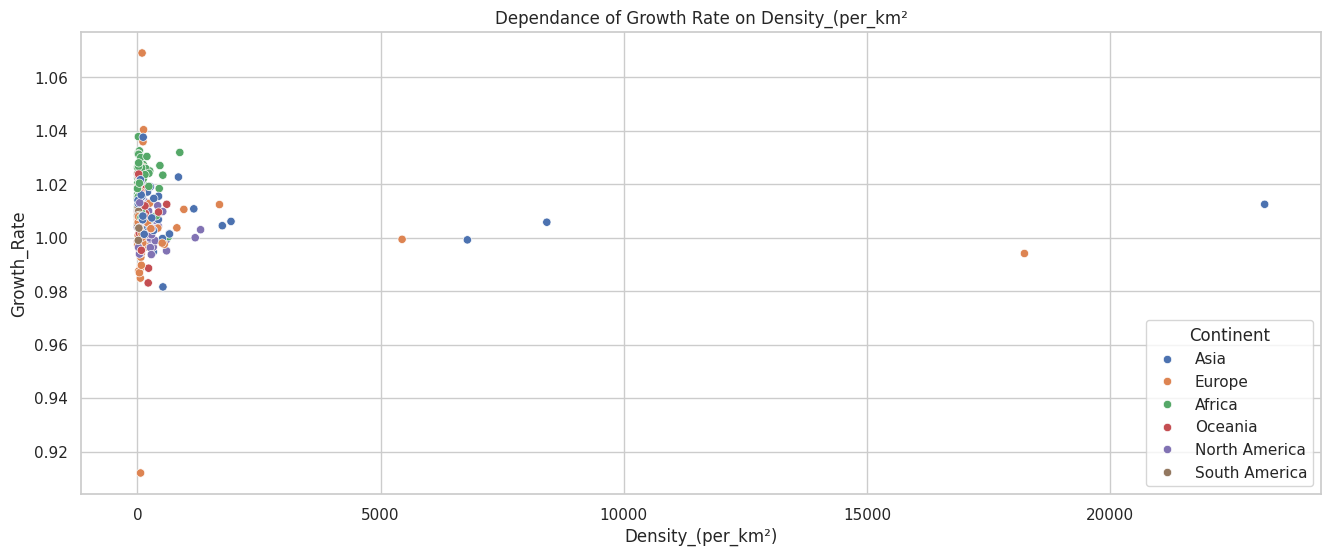

In [15]:
# Scatter plot demonstration connection between growth Rate on Density per per_km².

plt.figure(figsize=(16,6))
sns.scatterplot(x='Density_(per_km²)', y='Growth_Rate', data=world_pop, hue='Continent')
plt.title('Dependance of Growth Rate on Density_(per_km²')
plt.xlabel('Density_(per_km²)')
plt.ylabel('Growth_Rate')
plt.show()

# The outcome is not very informative. It doest demonstrate strong dependencies of Growth Rate of population on Density per per_km².

In [16]:
# Побудова кореляційної матриці (використовуємо лише числові стовпці)
numeric_data = world_pop.select_dtypes(include=[np.number])
corr = numeric_data.corr()
corr

,Rank,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022_Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020_Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015_Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010_Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000_Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990_Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980_Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970_Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area_(km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


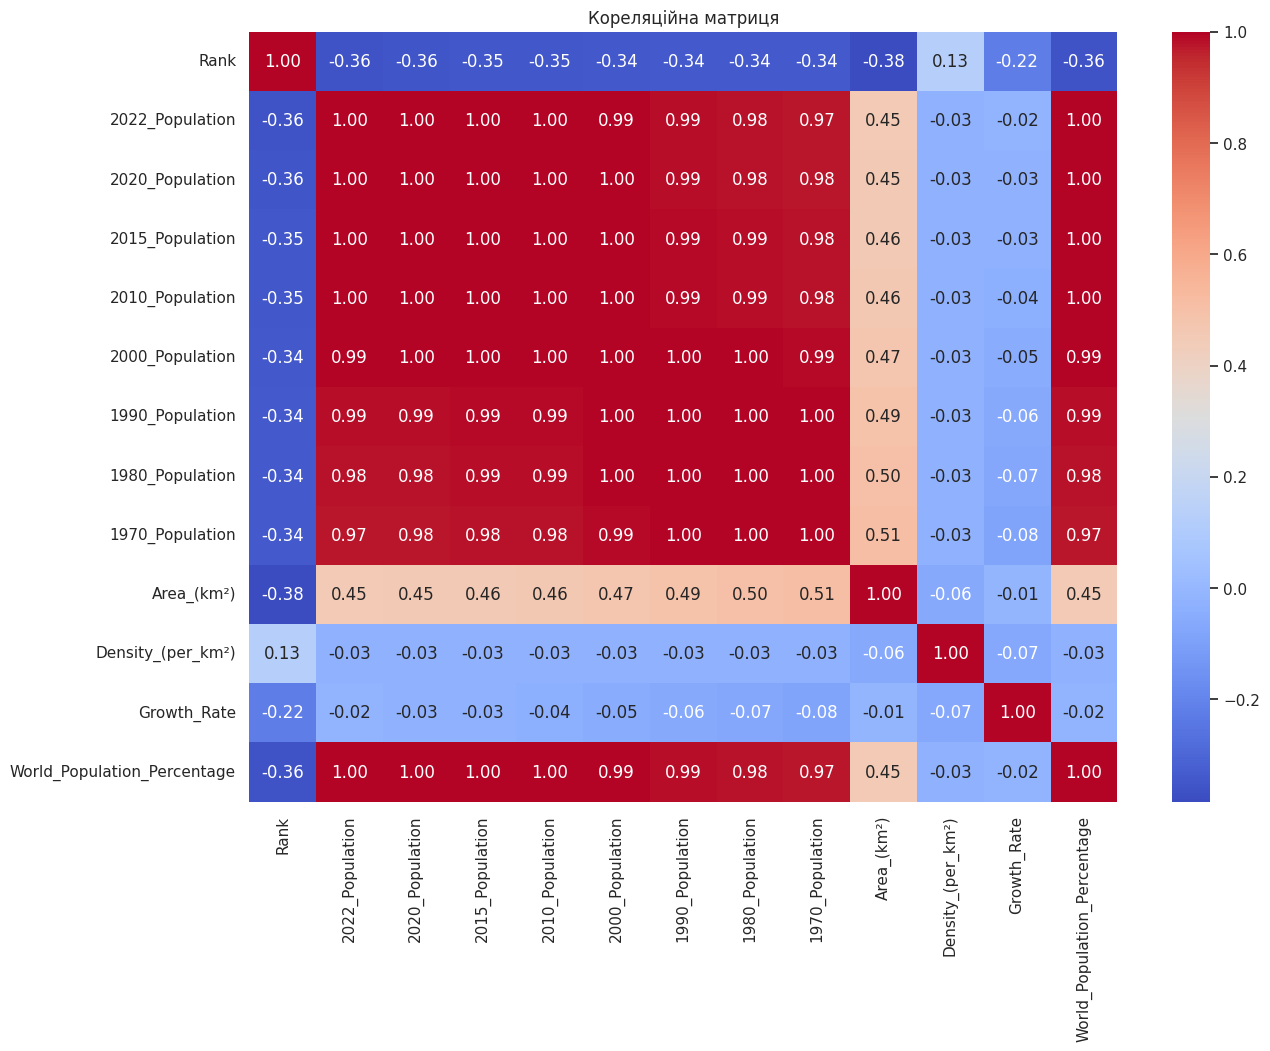

In [17]:
# Побудова кореляційної матриці (використовуємо лише числові стовпці)
numeric_data = world_pop.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()

# Коментар:
# Очікування: Отримати матрицю кореляцій між числовими змінними для виявлення сильних залежностей.
# Отримання: Кореляційна матриця демонструє позитивну кореляцію між total_bill та tip, що підтверджує попередні висновки.

In [19]:
world_pop['Growth_Rate'].value_counts().head(5)

,count
Growth_Rate,
1.0038,4
1.0052,3
1.0058,3
1.0108,3
1.0015,3


In [20]:
world_pop['Growth_Rate'].value_counts().tail(5)

,count
Growth_Rate,
1.0160,1
1.0238,1
0.9953,1
1.0217,1
1.0280,1


In [22]:
world_pop[world_pop['World_Population_Percentage'] > 2].sort_values("World_Population_Percentage", ascending=False, ignore_index=True)

# Pers_more_2 = world_pop[world_pop['World Population Percentage'] > 2].sort_values("World Population Percentage", ascending=False, ignore_index=True)
# Pers_more_2

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


In [24]:
Pers_more_2 = world_pop[world_pop['World_Population_Percentage'] > 2].sort_values("World_Population_Percentage", ascending=False, ignore_index=True)
Pers_more_2

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
5,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
6,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
7,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


In [26]:
# To display one row acoording ot its index (for example 117) with all colums.

world_pop.loc[117]

,117
Rank,141
CCA3,LTU
Country_Territory,Lithuania
Capital,Vilnius
Continent,Europe
2022_Population,2750055
2020_Population,2820267
2015_Population,2963765
2010_Population,3139019
2000_Population,3599637


In [27]:
# To display few rows according to its indexes in table view.

world_pop.loc[[117,118,119,120,121,200, 210]]

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
117,141,LTU,Lithuania,Vilnius,Europe,2750055,2820267,2963765,3139019,3599637,3785847,3521206,3210147,65300,42.1142,0.9869,0.03
118,168,LUX,Luxembourg,Luxembourg,Europe,647599,630399,569408,507070,435628,381267,363741,339342,2586,250.4250,1.0129,0.01
119,167,MAC,Macau,Concelho de Macau,Asia,695168,676283,615239,557297,431896,350227,245332,247284,30,23172.2667,1.0125,0.01
120,50,MDG,Madagascar,Antananarivo,Africa,29611714,28225177,24850912,21731053,16216431,11882762,8948162,6639751,587041,50.4423,1.0241,0.37
121,62,MWI,Malawi,Lilongwe,Africa,20405317,19377061,16938942,14718422,11229387,9539665,6267369,4625141,118484,172.2200,1.0259,0.26
200,87,SWE,Sweden,Stockholm,Europe,10549347,10368969,9849349,9381729,8871043,8548406,8311763,8027702,450295,23.4276,1.0079,0.13
210,197,TON,Tonga,Nuku‘alofa,Oceania,106858,105254,106122,107383,102603,98727,96708,86484,747,143.0495,1.0079,0.00


In [28]:
world_pop['2022_Population']

,2022_Population
0,41128771
1,2842321
2,44903225
3,44273
4,79824
...,...
229,11572
230,575986
231,33696614
232,20017675


In [29]:
world_pop['Growth_Rate']

,Growth_Rate
0,1.0257
1,0.9957
2,1.0164
3,0.9831
4,1.0100
...,...
229,0.9953
230,1.0184
231,1.0217
232,1.0280


In [ ]:
# pop_2025 = world_pop['2022_Population'] * world_pop['Growth_Rate']
# pop_2025


In [ ]:
# Додаю нову колонку, перемножуючи дві існуючі колонки
# world_pop['pop_2025'] = pop_2025
# world_pop.head(5)

# world_pop['pop_2025'] = world_pop['2022_Population'] * world_pop['Growth_Rate']
# world_pop.head(5)

In [30]:
import numpy as np

In [ ]:
# Створюю нову колонку шляхом перемноження 1 на номер рядка - це немає логіки лише для того щоб зрозуміти що
# np.arange(world_pop.shape[0]) - цей код створює список методом (np.arange) в діапазоні від о до значення world_pop.shape[0]
# world_pop.shape[0] - повертає кількість рядків в таблиці
# world_pop.shape[1] - повертає кількість стовбців в таблиці

# world_pop['Percentage'] = 1 * np.arange(world_pop.shape[0])
# world_pop

# world_pop['Percentage'] =world_pop['2022 Population'] * world_pop['Growth Rate'] * 1 * np.arange(world_pop.shape[0])
# world_pop

In [ ]:
# world_pop['Percentage'] = (1 * np.arange(world_pop.shape[0])).astype(float)
# world_pop

In [31]:
# Sort all countries from the Dataset which are included in mentioned continent in correspondent column (for ex: isin(['Asia'])] )

world_pop[world_pop['Continent'].isin(['Asia'])].head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03
13,91,AZE,Azerbaijan,Baku,Asia,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.6082,1.0044,0.13
15,154,BHR,Bahrain,Manama,Asia,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.4876,1.0061,0.02
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


In [35]:
# Сортує по категорії та фільтрує по числовому показнику
# * - AND
# + - OR

world_pop[world_pop['Continent'].isin(['Europe']) * world_pop['Area_(km²)'] > 90000].head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
18,96,BLR,Belarus,Minsk,Europe,9534954,9633740,9700609,9731427,10256483,10428525,9817257,9170786,207600,45.9295,0.9955,0.12
30,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09
67,118,FIN,Finland,Helsinki,Europe,5540745,5529468,5479461,5363271,5176209,4986545,4779418,4606621,338424,16.3722,1.0009,0.07
68,23,FRA,France,Paris,Europe,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586,551695,117.1419,1.0015,0.81
74,19,DEU,Germany,Berlin,Europe,83369843,83328988,82073226,81325090,81551677,79370196,77786703,78294583,357114,233.4544,0.9995,1.05


In [37]:
# def cat_Continent(Continent):
#   if Continent == Africa:
#     return '1'
#   if Continent == Asia:
#     return '2'
#   if Continent == Europe:
#     return '3'
#   if Continent == North:
#     return '4'
#   if Continent == Oceania:
#     return '5'
#   else:
#     return '6'

In [38]:
def cat_population(pop_2025):
  if pop_2025 < 142492978100:
    return '1'
  else:
    return '2'

In [40]:
world_pop['Cont_Population'] = world_pop['2022_Population'].apply(cat_population)
world_pop

,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage,Cont_Population
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,1
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,1
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,1
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00,1
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,1
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,1
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,1


In [45]:
cont_grouped = world_pop.groupby("Continent").agg({'2022_Population': ["mean", "sum", "median", "max", "min"]})
cont_grouped

2022_Population                                            
                         mean         sum      median         max     min
Continent                                                                
Africa           2.503037e+07  1426730932  13352864.0   218541212  107118
Asia             9.442767e+07  4721383274  18082920.0  1425887337  449002
Europe           1.486295e+07   743147538   5228714.0   144713314     510
North America    1.500740e+07   600296136    236399.0   338289857    4390
Oceania          1.958198e+06    45038554    114164.0    26177413    1871
South America    3.120119e+07   436816608  15112555.0   215313498    3780

In [ ]:
percent_cont = world_pop.groupby("Continent").apply(lambda x: x.Percentage.sum())
percent_cont

In [ ]:
mean_percent = world_pop.groupby("Continent")["Growth_Rate"].apply(lambda x: x > 1)
mean_percent

In [ ]:
pivot_world_pop = world_pop.pivot(index="Country_Territory", columns="Continent", values="2022_Population")
pivot_world_pop

In [ ]:
# series = pd.Series([1000,2000,3000], name="price")
# series